In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.preprocessing import combine_text, run_vader_analysis, sentiment_to_number


In [2]:
raw_df = pd.read_csv("../data/realdonaldtrump.csv")
raw_df["full_text"] = raw_df.apply(combine_text, axis=1)

In [3]:
vader_df = run_vader_analysis(raw_df)
#vader_df = pd.read_csv("../data/vader_sentiment.csv")

In [4]:
vader_df

,vader_clean,vader_sentiment_label,vader_numeric
0,sure tune watch Donald Trump Late Night David ...,positive,1
1,Donald Trump appearing View tomorrow morning d...,positive,1
2,Donald Trump reads Top Ten Financial Tips Late...,positive,1
3,New Blog Post Celebrity Apprentice Finale Less...,neutral,0
4,persona never wallflower Id rather build walls...,neutral,0
...,...,...,...
43347,Joe Biden TOTAL FAILURE Government bungled eve...,negative,2
43348,interviewed seanhannity tonight 900 PM Enjoy s...,positive,1
43349,IMG,neutral,0
43350,IMG,neutral,0


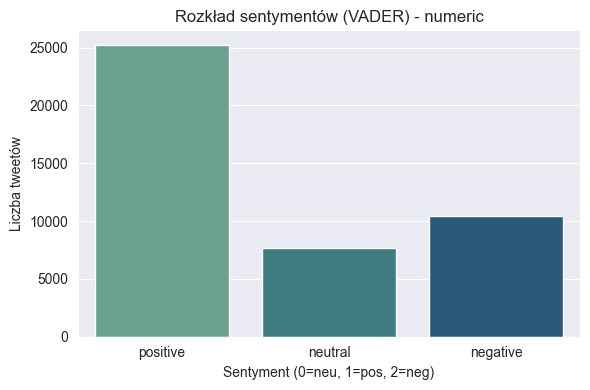

Neutral (0): 7711
Positive (1): 25223
Negative (2): 10418


In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=vader_df,
    x="vader_sentiment_label",
    hue="vader_sentiment_label",
    palette="crest",
    legend=False,
)
plt.title("Rozkład sentymentów (VADER) - numeric")
plt.xlabel("Sentyment (0=neu, 1=pos, 2=neg)")
plt.ylabel("Liczba tweetów")
plt.tight_layout()
plt.show()

In [7]:
vader_df.to_csv("../data/vader_sentiment.csv", index=False)
print("Zapisano: data/vader_sentiment.csv")

Zapisano: data/vader_sentiment.csv
